In [1]:
################################################################
### Notebook to visualize and analyze filesystem operation   ###
### benchmarks inside and outside ResidueFree using Iozone   ###
### test suite. Data and command-line prompts are in the     ###
### benchmark_results folder                                 ###
################################################################

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [3]:
#Class to maintain the name and an array of averages for each test mode
class IozoneTestMode:
    def __init__(self, name):
        self.name = name
        self.write_avgs = np.array([])
        self.rewrite_avgs = np.array([])
        self.read_avgs = np.array([])
        self.reread_avgs = np.array([])
        self.random_read_avgs = np.array([])
        self.random_write_avgs = np.array([])
        self.bkwd_read_avgs = np.array([])
        self.record_rewrite_avgs = np.array([])
        self.stride_read_avgs = np.array([])
        self.fwrite_avgs = np.array([])
        self.frewrite_avgs = np.array([])
        self.fread_avgs = np.array([])
        self.freread_avgs = np.array([])

In [4]:
Baseline = IozoneTestMode('baseline')
NoCryptoResidue = IozoneTestMode('NoEcryptFSResidue')
ResidueFree = IozoneTestMode('ResidueFree')

modes = [Baseline, NoCryptoResidue, ResidueFree]

dir = "benchmark_results/Iozone/"

for mode in modes:

    #Parse through all files generated under the same operational mode and maintain an array of averages
    #for each type of test across each run

    for i in range(1,31):
        fstring = dir + mode.name + '_iozone' + str(i) +'.txt'
        #print(fstring)
        file = open(fstring,'r')
        lines = file.read().splitlines()
        lines = lines[25:151]

        write = []
        rewrite = []
        read = []
        reread = []
        random_read = []
        random_write = []
        bkwd_read = []
        record_rewrite = []
        stride_read = []
        fwrite = []
        frewrite = []
        fread = []
        freread = []

        #Accumulate the kb/s per each test, regardless of file or record size
        for line in lines:
            #print("line")
            datapoints = line.split()
            write.append(int(datapoints[2]))
            rewrite.append(int(datapoints[3]))
            read.append(int(datapoints[4]))
            reread.append(int(datapoints[5]))
            random_read.append(int(datapoints[6]))
            random_write.append(int(datapoints[7]))
            bkwd_read.append(int(datapoints[8]))
            record_rewrite.append(int(datapoints[9]))
            stride_read.append(int(datapoints[10]))
            fwrite.append(int(datapoints[11]))
            frewrite.append(int(datapoints[12]))
            fread.append(int(datapoints[13]))
            freread.append(int(datapoints[14]))

        #Add averages for each test across that test run to array of averages for all 30 test runs
        mode.write_avgs = np.append(mode.write_avgs, statistics.mean(write))
        mode.rewrite_avgs = np.append(mode.rewrite_avgs, statistics.mean(rewrite))
        mode.read_avgs = np.append(mode.read_avgs, statistics.mean(read))
        mode.reread_avgs = np.append(mode.reread_avgs, statistics.mean(reread))
        mode.random_read_avgs = np.append(mode.random_read_avgs, statistics.mean(random_read))
        mode.random_write_avgs = np.append(mode.random_write_avgs, statistics.mean(random_write))
        mode.bkwd_read_avgs = np.append(mode.bkwd_read_avgs, statistics.mean(bkwd_read))
        mode.record_rewrite_avgs = np.append(mode.record_rewrite_avgs, statistics.mean(record_rewrite))
        mode.stride_read_avgs = np.append(mode.stride_read_avgs, statistics.mean(stride_read))
        mode.fwrite_avgs = np.append(mode.fwrite_avgs, statistics.mean(fwrite))
        mode.frewrite_avgs = np.append(mode.frewrite_avgs, statistics.mean(frewrite))
        mode.fread_avgs = np.append(mode.fread_avgs, statistics.mean(fread))
        mode.freread_avgs = np.append(mode.freread_avgs, statistics.mean(freread))

In [5]:
attributes = ["write_avgs", "rewrite_avgs", "record_rewrite_avgs", "read_avgs","reread_avgs", "random_read_avgs", "random_write_avgs",
              "bkwd_read_avgs",
              "stride_read_avgs", "fwrite_avgs", "frewrite_avgs", "fread_avgs", "freread_avgs"]

#Convert from Kb/s to Mb/s
for mode in modes:
    for attr in attributes:
        vars(mode)[attr] = [i/1000 for i in vars(mode)[attr]]

In [6]:
# Verify that conversion worked
#print (NoCryptoResidue.fread_avgs)

In [7]:
#Set fonttype so it is not type3 (for publishing)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

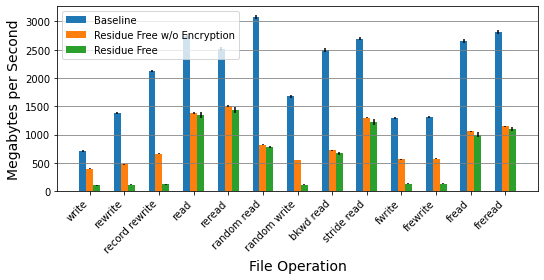

In [8]:
# Use matplotlib to graph file system operations and their standard deviations

Baseline_avgs = []
Baseline_std = []
NoCryptoResidue_avgs = []
NoCryptoResidue_std = []
Residue_avgs = []
Residue_std = []

Names = []

attributes = ["write_avgs", "rewrite_avgs", "record_rewrite_avgs", "read_avgs","reread_avgs", "random_read_avgs", "random_write_avgs",
              "bkwd_read_avgs",
              "stride_read_avgs", "fwrite_avgs", "frewrite_avgs", "fread_avgs", "freread_avgs"]

# Create arrays of means and standard deviations composed of the results from each test
for attr in attributes:
    Baseline_avgs.append(np.mean(vars(Baseline)[attr]))
    Baseline_std.append(np.std(vars(Baseline)[attr]))
    NoCryptoResidue_avgs.append(np.mean(vars(NoCryptoResidue)[attr]))
    NoCryptoResidue_std.append(np.std(vars(NoCryptoResidue)[attr]))
    Residue_avgs.append(np.mean(vars(ResidueFree)[attr]))
    Residue_std.append(np.std(vars(ResidueFree)[attr]))

fig, ax = plt.subplots()
ind = np.arange(len(Baseline_avgs))
width = 0.2

# Create clustered bar charts (all three modes clustered around each test)
Baseline_rects = ax.bar(ind - width, Baseline_avgs, width, yerr=Baseline_std, label='Baseline')
NoCryptoResidue_rects = ax.bar(ind, NoCryptoResidue_avgs, width, yerr=NoCryptoResidue_std, label='Residue Free w/o Encryption')
Residue_rects = ax.bar(ind + width, Residue_avgs, width, yerr=Residue_std, label='Residue Free')


# Label each test, shortening some of them
att_names = []
for attr in attributes:
    if attr == "random_read_avgs":
        att_names.append("rand_read")
    elif attr == "random_write_avgs":
        att_names.append("rand_write")
    else:
        att_names.append(attr.split('_avgs')[0])

# Set graph labels
ax.set_ylabel("Megabytes per Second", fontsize=14)
ax.set_xlabel("File Operation", fontsize=14)
ax.set_xticks(ind)
xlabels = [var.replace('_',' ') for var in att_names]
xlabels = [var.replace('rand','random') for var in xlabels]
ax.set_xticklabels(xlabels, fontsize=10, rotation=45, ha='right')
#ax.set_alpha(20)
ax.legend(fontsize=10)

# Set figure display options
fig.tight_layout()
fig.set_size_inches(8, 4, forward=True)
plt.grid(b=True,which="major",axis="y",color='gray')
plt.yticks(fontsize=10)
plt.style.use('tableau-colorblind10')
fig.set_facecolor('white')
plt.savefig("./Figures/Files.pdf")
plt.show()

In [9]:
# Compare ResidueFree to normal operations
print(np.mean(Residue_avgs))
print(np.mean(Baseline_avgs))
print(np.mean(Residue_avgs) / np.mean(Baseline_avgs))

636.9033613960114
2113.7635080179075
0.30131249734424675


In [10]:
# Compare ResidueFree without encryption to normal operations
print(np.mean(NoCryptoResidue_avgs))
print(np.mean(Baseline_avgs))
print(np.mean(NoCryptoResidue_avgs) / np.mean(Baseline_avgs))

858.898613960114
2113.7635080179075
0.4063361916799812


In [11]:
# Compare ResidueFree operations with and without encryption
print(np.mean(Residue_avgs))
print(np.mean(NoCryptoResidue_avgs))
print(np.mean(Residue_avgs) / np.mean(NoCryptoResidue_avgs))

636.9033613960114
858.898613960114
0.741534974028481


In [12]:
# Compare ResidueFree read and write operations with and without encryption

Writes_Residue = []
Reads_Residue = []
Writes_NoCrypto = []
Reads_NoCrypto = []

# Group all tests into either write or read tests
for attr in attributes:
    if attr.find("write") != -1:
        Writes_Residue.append(np.mean(vars(ResidueFree)[attr]))
        Writes_NoCrypto.append(np.mean(vars(NoCryptoResidue)[attr]))
    elif attr =="name":
        print('')
    else:
        Reads_Residue.append(np.mean(vars(ResidueFree)[attr]))
        Reads_NoCrypto.append(np.mean(vars(NoCryptoResidue)[attr]))

# Compare encrypted writes as a percentage of unencrypted writes            
print(np.mean(Writes_Residue))
print(np.mean(Writes_NoCrypto))
print(np.mean(Writes_Residue) / np.mean(Writes_NoCrypto))
print('')

# Compate encrypted reads as a percentage of unencrypted reads
print(np.mean(Reads_Residue))
print(np.mean(Reads_NoCrypto))
print(np.mean(Reads_Residue) / np.mean(Reads_NoCrypto))

119.95703223104057
536.9901236772487
0.223387781156175

1080.0002149659865
1134.8201770597127
0.9516928204116328
